In [1]:
import networkx as nx
import pandas as pd
import numpy as np
import random
from tqdm import tqdm
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
from gensim.models import Word2Vec

In [104]:
G = nx.karate_club_graph() #karate data 

In [105]:
G.nodes

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33))

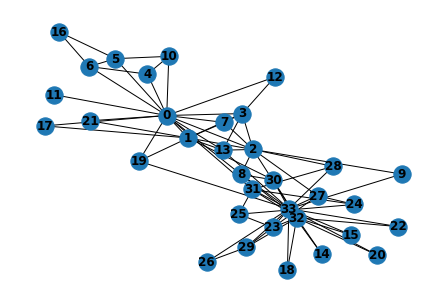

In [106]:
nx.draw(G, with_labels=True, font_weight='bold')

In [151]:
class DeepWalk():
    def __init__(self, G, w, d, gamma, t):
        self.G = nx.karate_club_graph() #karate data 
        self.w = 10 # window size
        self.d = 6 # embedding size
        self.gamma = 20 # walks per vertex (iteration)
        self.t = 5 # walk length

    def get_random_walk(self, node, t):
        # initialization
        list_random_walk = [node]
        
        # walk_length 만큼 반복
        for i in range(t-1):
            # 그래프 G에서 이웃 list
            list_neighbors = list(G.neighbors(node))
            # list_random_walk 와 list_neighbors 의 중복 방지
            list_neighbors = list(set(list_neighbors) - set(list_random_walk))    
            if len(list_neighbors) == 0:
                break
            # list_neighborsd에서 random으로 이웃 선택
            random_neighbor = random.choice(list_neighbors)
            # 랜덤 이웃 추가
            list_random_walk.append(random_neighbor)
            node = random_neighbor
            
        return list(map(str,list_random_walk)) #문자열로 변환하여 출력

    def embedding_upadte(self):

        all_nodes = list(G.nodes()) # G의 모든 node list
        random_walks = []

        for node in all_nodes:
            # Gamma 만큼 반복
            for i in range(self.gamma):
                # 사전에 정의된 random_walk 함수를 사용해 저장
                random_walks.append(self.get_random_walk(node, self.t))

        skipgram_embedding = Word2Vec(window=self.w, size=self.d, sg=1, hs=1)
        skipgram_embedding.build_vocab(random_walks, progress_per=2)
        skipgram_embedding.train(random_walks, total_examples = skipgram_embedding.corpus_count, epochs=self.gamma, report_delay=1)

        return skipgram_embedding

In [152]:
model = DeepWalk(G,10,6,20,5)
embedding = model.embedding_upadte()

In [153]:
print(embedding)

Word2Vec(vocab=34, size=6, alpha=0.025)


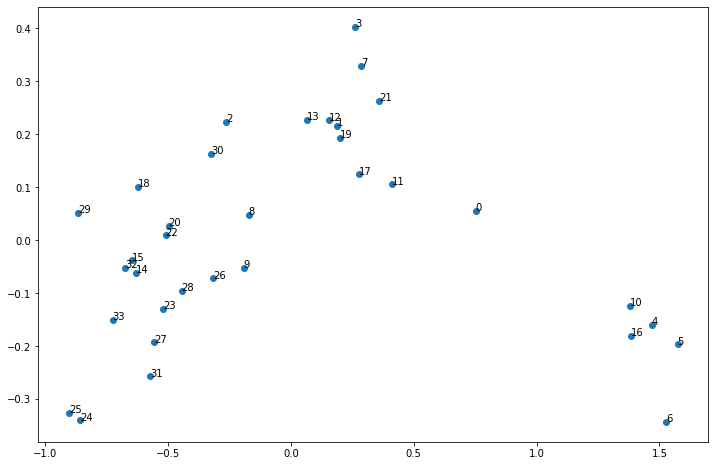

In [154]:
# Visualization of DeepWalk Embedding

X = embedding.wv[list(map(str,G.nodes))]

# 2-Dimension 로 변환
pca = PCA(n_components=2)
result = pca.fit_transform(X)

# scatter plot
plt.figure(figsize=(12,8))
plt.scatter(result[:, 0], result[:, 1])
for i, word in enumerate(list(map(str,G.nodes))):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))
    